In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from training_utils import CIFAR10_dataloaders, training_monitor, print_model_size

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [2]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            # Block 1: Using a 5x5 kernel instead of 11x11 (suitable for CIFAR-10)
            nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 2
            nn.Conv2d(64, 192, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 3
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            # Block 4
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            # Block 5
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Flatten(),  # Use Flatten layer instead of view
            nn.Linear(256 * 4 * 4, 4096),  # 32x32 input -> final feature map 4x4 after pooling
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [3]:
print_model_size(AlexNet())

Total params = 3.679227e+07
Trainable params = 3.679227e+07


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

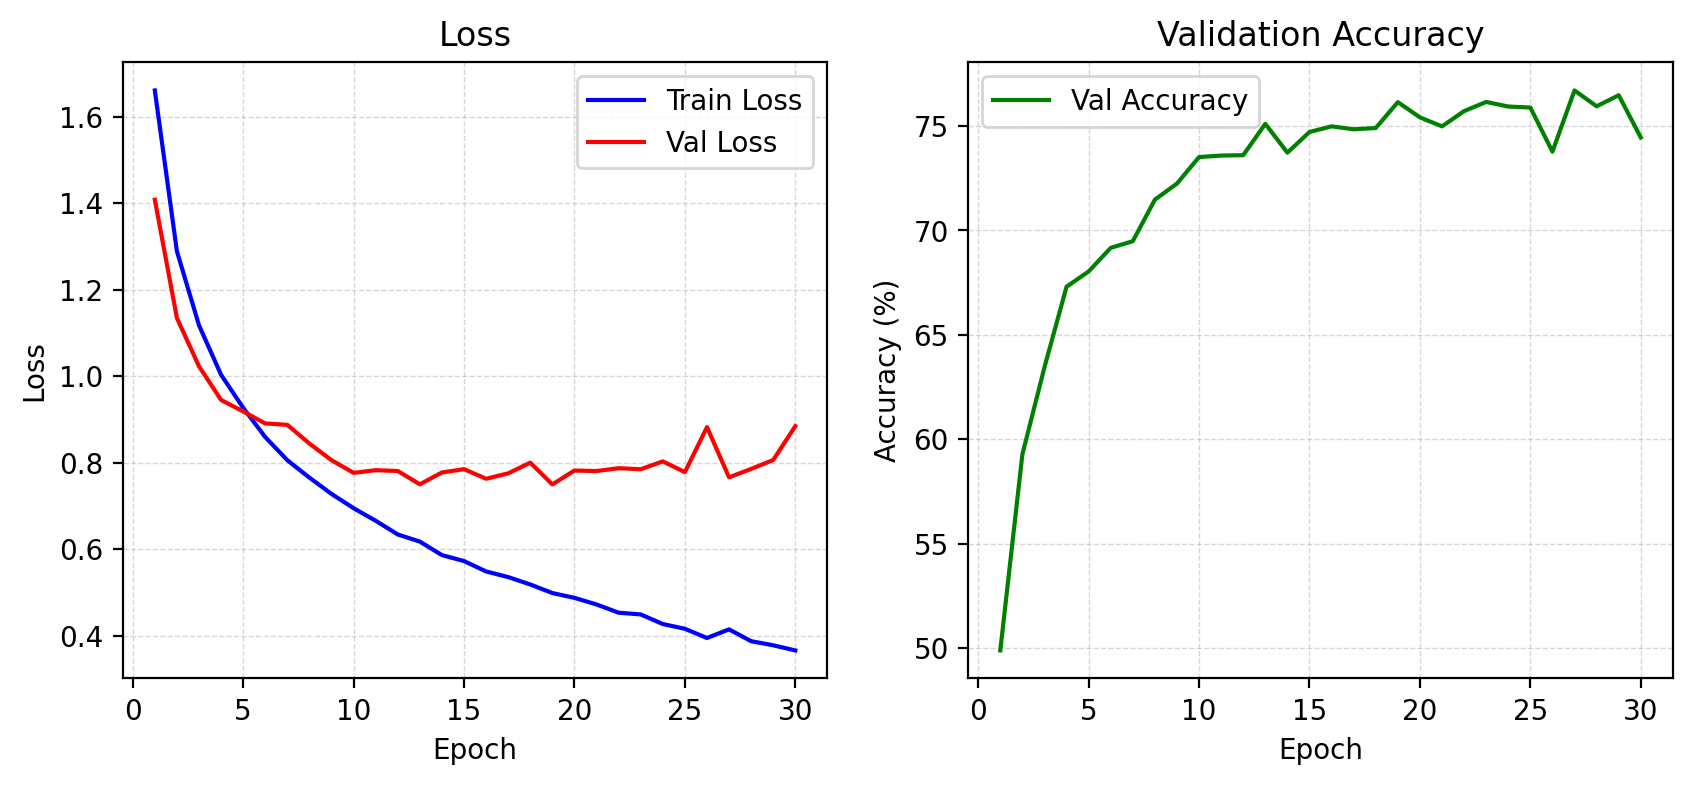

Epoch 30/30: 100%|##########| 30/30 [23:27<00:00, 32.61s/it]

|       Epoch        |     Train loss     |  Validation loss   | Validation accuracy, %  |
__________________________________________________________________________________________
|         1          |       1.6605       |       1.4078       |         49.8800         |
|         2          |       1.2887       |       1.1345       |         59.2700         |
|         3          |       1.1176       |       1.0228       |         63.4400         |
|         4          |       1.0032       |       0.9451       |         67.3000         |
|         5          |       0.9268       |       0.9184       |         68.0300         |
|         6          |       0.8592       |       0.8907       |         69.1600         |
|         7          |       0.8057       |       0.8875       |         69.4800         |
|         8          |       0.7655       |       0.8443       |         71.4700         |
|         9          |       0.7278       |       0.8059       |         72.2400         |

In [4]:
trainloader, testloader, classes = CIFAR10_dataloaders(batch_size=64)
model = AlexNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30

trained_model = training_monitor(device, model, optimizer, criterion, num_epochs, trainloader, testloader)
